<h1><u>An Analysis on Illegal Immigration in the U.S. from 2000-2016</u></h1>
<h3><i>By William Bermudez & Aastha Khanna</i></h3>
<br/>

General description goes here



In [55]:
from numpy import *
from pandas import *
import matplotlib.pyplot as plt

data = read_csv("arrests.csv")
data

,Border,Sector,State/Territory,2000 (All Illegal Immigrants),2000 (Mexicans Only),2001 (All Illegal Immigrants),2001 (Mexicans Only),2002 (All Illegal Immigrants),2002 (Mexicans Only),2003 (All Illegal Immigrants),...,2012 (All Illegal Immigrants),2012 (Mexicans Only),2013 (All Illegal Immigrants),2013 (Mexicans Only),2014 (All Illegal Immigrants),2014 (Mexicans Only),2015 (All Illegal Immigrants),2015 (Mexicans Only),2016 (All Illegal Immigrants),2016 (Mexicans Only)
0,Coast,Livermore,CA,6205,6034,5211,5007,4371,4186,3565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Coast,Miami,"FL, GA, SC, NC",6237,2421,5962,1590,5143,1825,5931,...,2509.0,831.0,1738.0,388.0,2034.0,277.0,1752.0,273.0,3205.0,652.0
2,Coast,New Orleans,"LA, AL, MS, FL",6478,5985,5033,4616,4665,4126,5151,...,474.0,277.0,500.0,262.0,950.0,465.0,849.0,394.0,764.0,388.0
3,Coast,Ramey,PR,1731,0,1952,0,835,0,1688,...,702.0,0.0,924.0,3.0,958.0,0.0,557.0,1.0,694.0,0.0
4,Coast,All,"PR, LA, AL, MS, FL, GA, SC, NC",20651,14440,18158,11213,15014,10137,16335,...,3685.0,1108.0,3162.0,653.0,3942.0,742.0,3158.0,668.0,4663.0,1040.0
5,North,Blaine,"WA, OR",2581,1560,2089,1214,1732,1059,1380,...,537.0,270.0,360.0,106.0,272.0,58.0,282.0,67.0,271.0,40.0
6,North,Buffalo,"NY, PA",1570,978,1434,850,1102,421,564,...,1143.0,607.0,796.0,370.0,741.0,294.0,291.0,137.0,226.0,82.0
7,North,Detroit,"OH, MI, IN, IL",2057,1634,2106,1772,1511,1125,2345,...,950.0,673.0,650.0,479.0,647.0,431.0,637.0,427.0,716.0,504.0
8,North,Grand Forks,"WI, MN, ND",562,373,921,755,1369,1068,1223,...,418.0,306.0,469.0,337.0,767.0,532.0,789.0,563.0,505.0,352.0
9,North,Havre,MT,1568,1375,1305,1153,1463,1199,1406,...,102.0,54.0,88.0,62.0,91.0,51.0,64.0,46.0,43.0,12.0


This dataset, which was created based on the designations the U.S. Border Patrol follows, organizes these arrests based on regions called 'sectors' which group different states and territories together. The table itself organizes this data with the following types of columns:
<ul>
    <li><b>Border: </b>Specifies which border the arrest was made on.<ul>
        <li><i>North: </i>The U.S./Canadian border.</li>
        <li><i>Sourthwest: </i>The U.S./Mexican border.</li>
        <li><i>Coast: </i>Any region that touches only open water.</li> 
    </ul></li>
    <li><b>Sector: </b>The name of the sector, which is a collection of regions within the states.</li>
    <li><b>State/Territory: </b>The states/territories that are included in the sector (PR = Puerto Rico).</li>
    <li><b>20XX (All Illegal Immigrants): </b>The total # of arrests made by the U.S. Border Patrol in that sector in the year 20XX.</li>
    <li><b>20XX (Mexicans Only): </b>The # of arrests made made by the U.S. Border Patrol in that sector of people of Mexican nationality in the year 20XX.</li>
</ul>

While looking at our dataframe, we realized that the row with the sector Livermore had NaN (Not a Number) values for all years after 2005. To figure out why this occurred, we looked up the history of the Livermore sector for the U.S. Border Patrol and discovered that it was dissolved in 2006, as the sectors covering the states of California and Nevada were redrawn that year. The two maps below show what the drawn sectors looked like before and after 2006: 

Border Map Before 2006 - Livermore lies on the left side of the map (Also pay mind that this map is older than our data set, so Rio Grande Valley is McAllen)
![Border Map 1](http://wiki.radioreference.com/images/1/13/BPsectormap.jpg "Border Map Pre-2006")

Border Map After 2006 - Livermore is removed and its space is taken by San Diego, El Centro, and Yuma
![Border Map 2](https://upload.wikimedia.org/wikipedia/commons/d/d0/CBP_Sectors_Map.jpg "Border Map Post-2006")

Now that we know we have to deal with these NaN values, we must tidy our data! There are several methods to deal with tidy data such as imputing the missing data, replacing the NaN values with 0s, or just throwing the missing data rows away. (You can read more about dealing with missing data <a href="http://www.stat.columbia.edu/~gelman/arm/missing.pdf">here</a>)

We decided to deal with the NaNs for Livermore by replacing them with 0s, as we did not have a similar dataset to impute the values from, and the data for that sector is too significant to throw away. For most cases, replacing with 0 is advised against since it gives the impression that there weren't any immigrants arrested in that region, not that the region doesn't exist anymore. However, since we have only one case of missing data and we know the reason why that data is missing from external research, we'll just keep that in mind as we move forward. The 0s will help with data visualization later on, since some plotting functions don't know how to deal with NaN values.

Let's do that here:

In [56]:
data.Sector.fillna('All', inplace=True) # Sets the one NaN value in the Sector column to 'None' instead of NaN
data.fillna(0, inplace=True) # Replaces the rest of the NaN values (the ones in Livermore) to 0

data_trend = data.loc[[4,13,23]].reset_index() # Selects the rows that included the totals for each Border.

data = data.loc[data.Sector != 'All'] # Removes total rows so we can manually calculate totals for the all rows
data = melt(data, ['Border', 'Sector', 'State/Territory'], var_name = 'Year', value_name='Arrests')

i = 0
for r in data.iterrows():
    s = data.iat[i, 3]
    if ('All' in s): 
        data = data.set_value(i, 'Type', 'All Arrests')
    else: 
        data = data.set_value(i, 'Type', 'Mex Arrests')
    i += 1
    
data['Year'] = data['Year'].str.extract('(\d{4})', expand=False).astype(int)
data = data.drop(['State/Territory'], 1)

data = pivot_table(data, values='Arrests', index=['Border', 'Sector', 'Year'], columns = ['Type'])

data['Non-Mex Arrests'] = data['All Arrests'] - data['Mex Arrests']

data

Type                      All Arrests  Mex Arrests  Non-Mex Arrests
Border    Sector    Year                                           
Coast     Livermore 2000       6205.0       6034.0            171.0
                    2001       5211.0       5007.0            204.0
                    2002       4371.0       4186.0            185.0
                    2003       3565.0       3382.0            183.0
                    2004       1850.0       1753.0             97.0
                    2005        114.0        106.0              8.0
                    2006          0.0          0.0              0.0
                    2007          0.0          0.0              0.0
                    2008          0.0          0.0              0.0
                    2009          0.0          0.0              0.0
                    2010          0.0          0.0              0.0
                    2011          0.0          0.0              0.0
                    2012          0.0          0.0              0.0
                    2013          0.0          0.0              0.0
                    2014          0.0          0.0              0.0
                    2015          0.0          0.0              0.0
                    2016          0.0          0.0              0.0
          Miami     2000       6237.0       2421.0           3816.0
                    2001       5962.0       1590.0           4372.0
                    2002       5143.0       1825.0           3318.0
                    2003       5931.0       2481.0           3450.0
                    2004       4602.0       2007.0           2595.0
                    2005       7245.0       2325.0           4920.0
                    2006       6032.0       1616.0           4416.0
                    2007       7120.0       1612.0           5508.0
                    2008       6020.0       1564.0           4456.0
                    2009       4425.0       1857.0           2568.0
                    2010       4651.0       1837.0           2814.0
                    2011       4401.0       1529.0           2872.0
                    2012       2509.0        831.0           1678.0
...                               ...          ...              ...
Southwest Tucson    2004     491771.0     482990.0           8781.0
                    2005     439079.0     426416.0          12663.0
                    2006     392074.0     382610.0           9464.0
                    2007     378239.0     366456.0          11783.0
                    2008     317696.0     305429.0          12267.0
                    2009     241673.0     230045.0          11628.0
                    2010     212202.0     195921.0          16281.0
                    2011     123285.0     111974.0          11311.0
                    2012     120000.0     102303.0          17697.0
                    2013     120939.0     101092.0          19847.0
                    2014      87915.0      68870.0          19045.0
                    2015      63397.0      48916.0          14481.0
                    2016      64891.0      46494.0          18397.0
          Yuma      2000     108747.0     108236.0            511.0
                    2001      78385.0      77974.0            411.0
                    2002      42654.0      42260.0            394.0
                    2003      56638.0      55927.0            711.0
                    2004      98060.0      96640.0           1420.0
                    2005     138438.0     136767.0           1671.0
                    2006     118549.0     117553.0            996.0
                    2007      37992.0      37380.0            612.0
                    2008       8363.0       8016.0            347.0
                    2009       6951.0       6546.0            405.0
                    2010       7116.0       6705.0            411.0
                    2011       5833.0       5416.0            417.0
                    2012       6500.0       5919.0      

Our data is tidy now, and we can start to analyze the data in different ways. We want to look at the following things:
<ul>
    <li>The general trend of arrests in all regions throughout the years (are these arrests increasing? Decreasing? In a cycle?)</li>
    <li>The percentage of arrests coming from each border over time, to see if more immigrants are coming in from certain places than others</li>
    <li>The proportion of Mexican vs. non-Mexican arrests over the years, and whether or not that percentrage has increased or decreased.</li>
    <li>

In [57]:
idx = IndexSlice

coast = data.loc['Coast', :]
coast_sumsec = coast.groupby(level='Year').sum()

south = data.loc['Southwest', :]
south_sumsec = south.groupby(level='Year').sum()

north = data.loc['North', :]
north_sumsec = north.groupby(level='Year').sum()

all_sumsec = data.groupby(level=['Year']).sum()

south.head(20)

Type           All Arrests  Mex Arrests  Non-Mex Arrests
Sector   Year                                           
Big Bend 2000      13689.0      12851.0            838.0
         2001      12087.0      11107.0            980.0
         2002      11392.0      10321.0           1071.0
         2003      10319.0       9477.0            842.0
         2004      10530.0       9736.0            794.0
         2005      10536.0       9568.0            968.0
         2006       7520.0       6791.0            729.0
         2007       5536.0       5002.0            534.0
         2008       5391.0       4756.0            635.0
         2009       6360.0       5573.0            787.0
         2010       5288.0       4754.0            534.0
         2011       4036.0       3621.0            415.0
         2012       3964.0       3417.0            547.0
         2013       3684.0       3174.0            510.0
         2014       4096.0       3164.0            932.0
         2015       5031.0       2177.0           2854.0
         2016       6366.0       2728.0           3638.0
Del Rio  2000     157178.0     150467.0           6711.0
         2001     104875.0     100265.0           4610.0
         2002      66985.0      64169.0           2816.0

In [58]:
coast_sumsec

Type,All Arrests,Mex Arrests,Non-Mex Arrests
Year,,,
2000,20651.0,14440.0,6211.0
2001,18158.0,11213.0,6945.0
2002,15014.0,10137.0,4877.0
2003,16335.0,10215.0,6120.0
2004,11154.0,6043.0,5111.0
2005,10336.0,3415.0,6921.0
2006,10521.0,3458.0,7063.0
2007,11686.0,4245.0,7441.0
2008,10895.0,4487.0,6408.0


Based on these visualizations, we can see that almost all of the of arrests made by US Border Patrol are made at the Southwest border of the United States. Taking this into account, let's look at the distribution of arrests in all the sectors that are classified under Southwest.

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


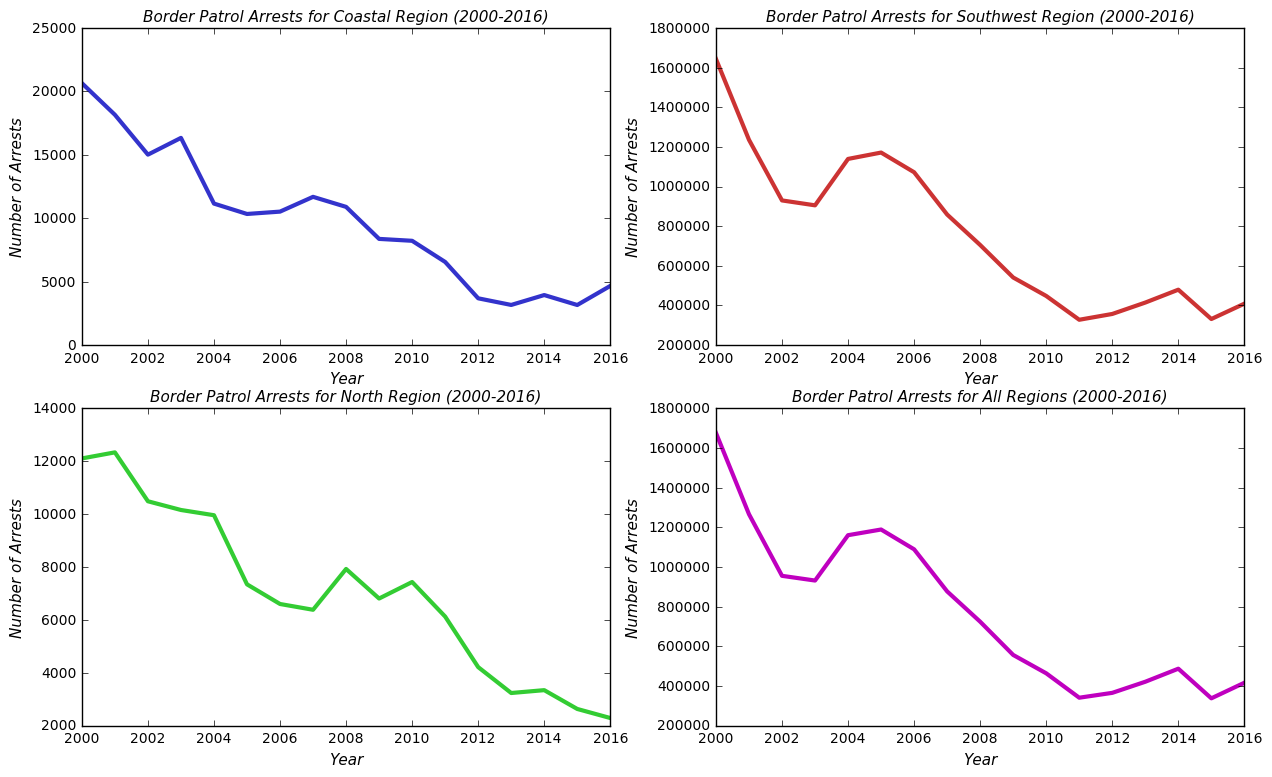

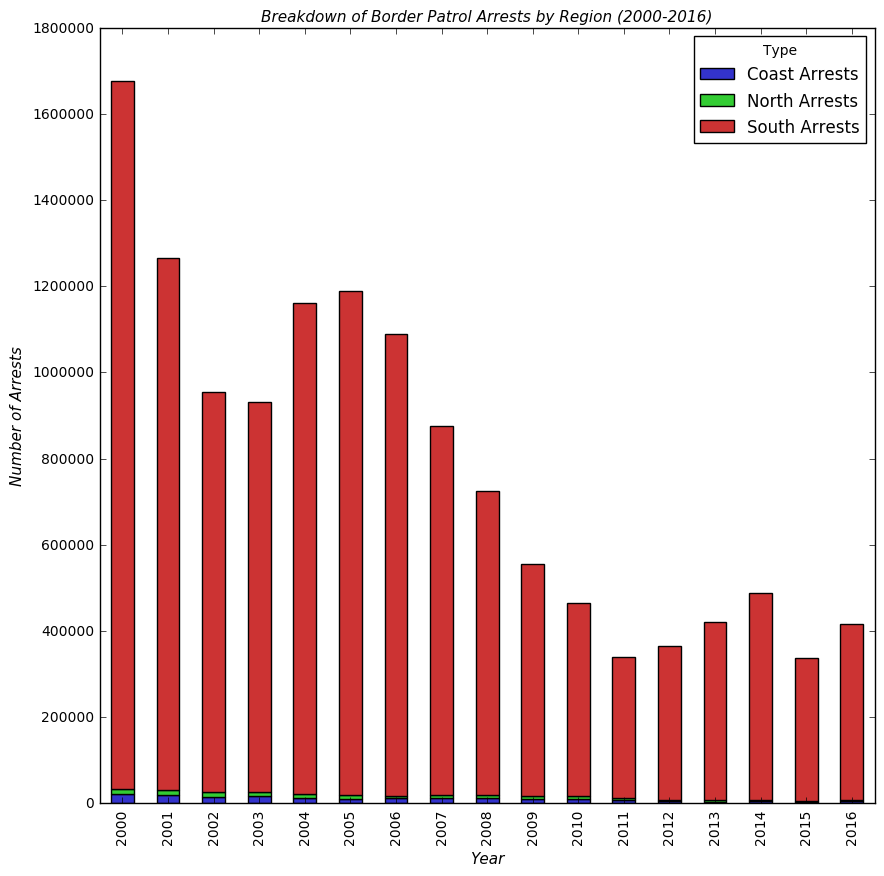

In [59]:
plt.gcf().set_size_inches(15,9)
coast_color = '#3333cc'
north_color = '#33cc33'
south_color = '#cc3333'

plt.subplot(2, 2, 1)
coast_sumsec['All Arrests'].plot(linewidth=3, color=coast_color, legend=None)
plt.title('Border Patrol Arrests for Coastal Region (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

plt.subplot(2, 2, 2)
south_sumsec['All Arrests'].plot(linewidth=3, color=south_color, legend=None)
plt.title('Border Patrol Arrests for Southwest Region (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

plt.subplot(2, 2, 3)
north_sumsec['All Arrests'].plot(linewidth=3, color=north_color, legend=None)
plt.title('Border Patrol Arrests for North Region (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

plt.subplot(2, 2, 4)
all_sumsec['All Arrests'].plot(linewidth=3, color='m', legend=None)
plt.title('Border Patrol Arrests for All Regions (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')


stack_sec = coast_sumsec[['All Arrests']]
stack_sec['North Arrests'] = north_sumsec['All Arrests']
stack_sec['South Arrests'] = south_sumsec['All Arrests']
stack_sec.rename(columns={'All Arrests' : 'Coast Arrests'}, inplace=True)

stack_sec.plot(kind='bar', stacked=True, color=[coast_color, north_color, south_color])

plt.gcf().set_size_inches(10,10)
plt.title('Breakdown of Border Patrol Arrests by Region (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')
plt.show()

Our next visualization will be aimed at breaking down the proportion of arrests of people of Mexican vs. Non-Mexican nationality based on year and region.

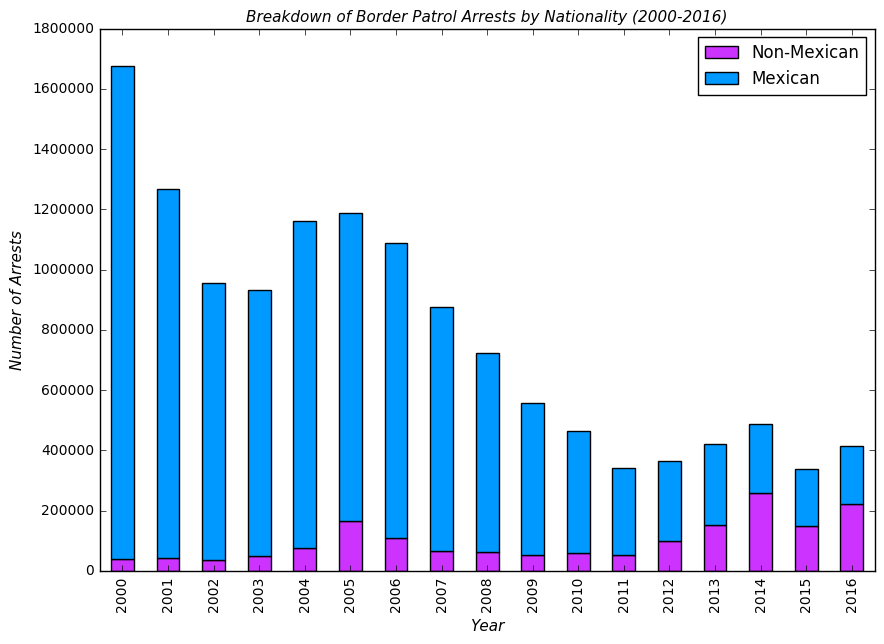

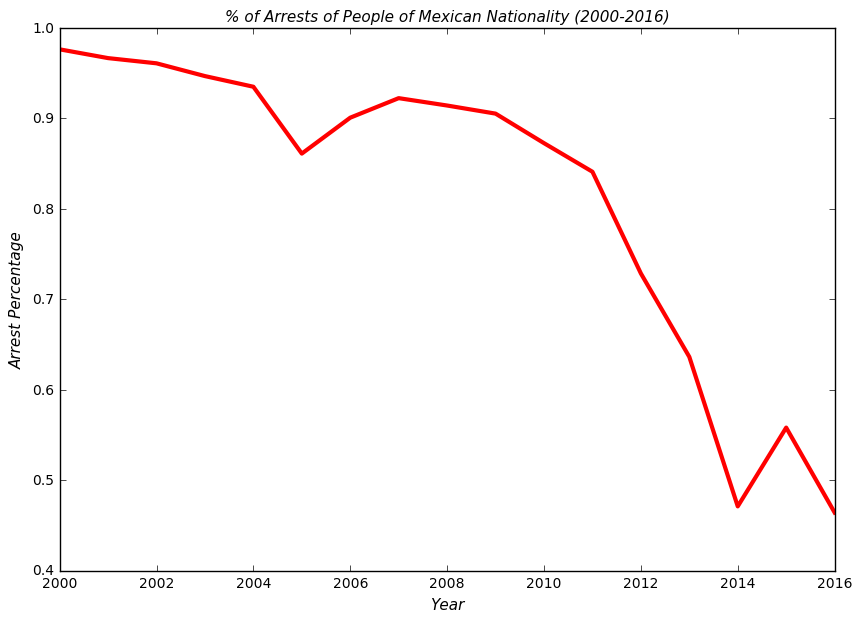

In [60]:
all_sumsec['Percentage Mex'] = all_sumsec['Mex Arrests'] / all_sumsec['All Arrests']
#plt.gcf().set_size_inches(10,10)

all_sumsec[['Non-Mex Arrests', 'Mex Arrests']].plot(kind='bar', stacked=True, color=['#cc33ff','#0099ff'])
plt.gcf().set_size_inches(10,7)

plt.title('Breakdown of Border Patrol Arrests by Nationality (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')
plt.legend(['Non-Mexican','Mexican'])

plt.figure()
all_sumsec['Percentage Mex'].plot(kind='line', linewidth=3, color='r')
plt.gcf().set_size_inches(10,7)
plt.title('% of Arrests of People of Mexican Nationality (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Arrest Percentage', fontsize=11, style='oblique')

plt.show()

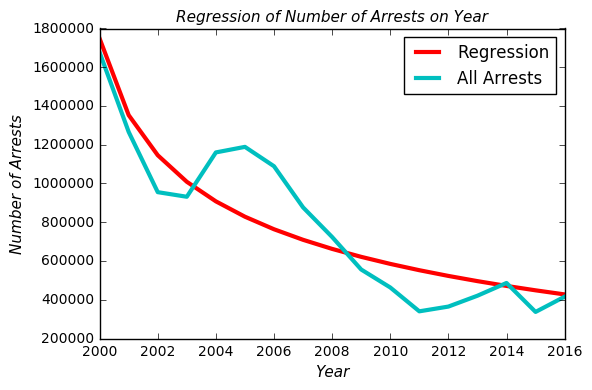

In [61]:
from scipy.optimize import curve_fit

xdata = np.array(all_sumsec.index)
ydata = np.array(all_sumsec['All Arrests'])

def f(x, p1, p2, b):
  return (p1/(p2*((x-1999)**.2))) + b

popt, pcov = curve_fit(f, xdata, ydata,p0=None)

p1 = popt[0]
p2 = popt[1]
b = popt[2]
residuals = ydata - f(xdata,p1,p2,b)
fres = sum(residuals**2)

all_sumsec['Regression'] = (p1/(p2*((all_sumsec.index-1999)**.2))) + b

all_sumsec['Regression'].plot(kind='line', linewidth=3, color='r', legend=True)
all_sumsec['All Arrests'].plot(kind='line', linewidth=3, color='c', legend=True)

plt.title('Regression of Number of Arrests on Year',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

plt.show()

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


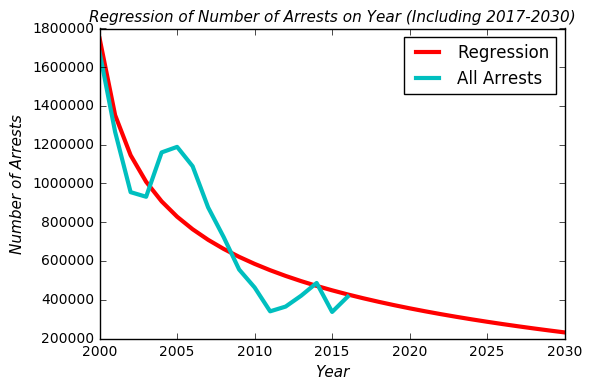

In [62]:
pred_table = all_sumsec[['All Arrests']]
for i in range(2017,2031):
    pred_table.loc[i] = np.NaN

pred_table['Regression'] = (p1/(p2*((pred_table.index-1999)**.2))) + b

pred_table['Regression'].plot(kind='line', linewidth=3, color='r', legend=True)
pred_table['All Arrests'].plot(kind='line', linewidth=3, color='c', legend=True)

plt.title('Regression of Number of Arrests on Year (Including 2017-2030)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

plt.show()

TO DO:

Make plot on Southwest border showing the distribution of each sector.

Make claim stating that the intensity of arrests has declined over the years.

Make maplike visualization using folium on the intensity of arrests in each sector per year.

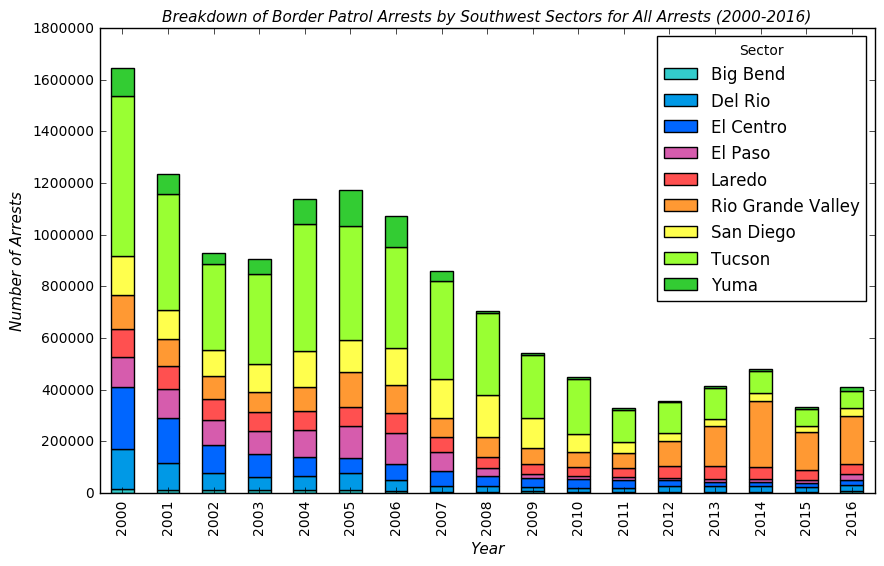

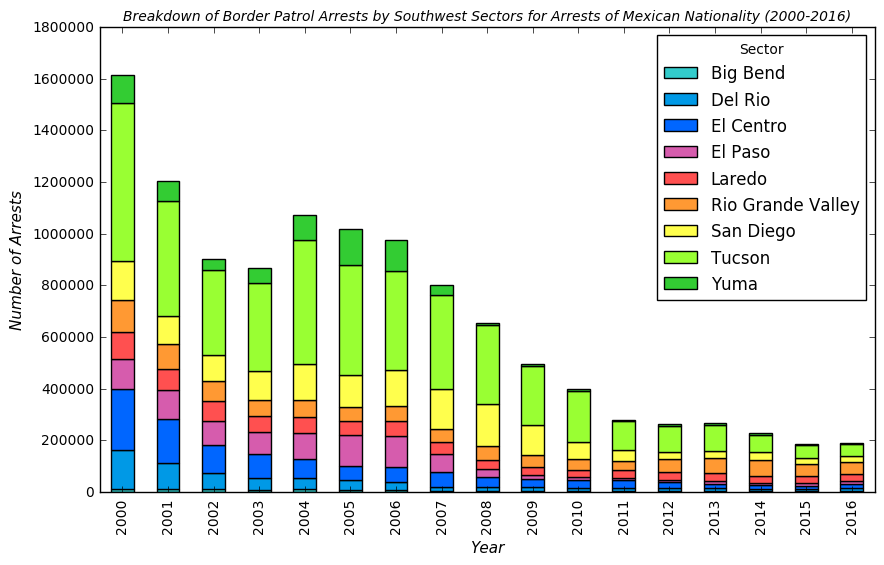

In [63]:
south_all = south[['All Arrests']]
south_mex = south[['Mex Arrests']]

south_all = south_all.unstack(level=0)['All Arrests']
south_mex = south_mex.unstack(level=0)['Mex Arrests']

colors = ['#33cccc','#0099e6', '#0066ff', '#d65cad', '#ff5050', '#ff9933', '#ffff4d', '#99ff33', '#33cc33']

#plt.figure()


#plt.subplot(2,2,1)
south_all.plot(kind='bar', stacked=True, color=colors)#, color=[coast_color, north_color, south_color])
plt.gcf().set_size_inches(10,6)
plt.title('Breakdown of Border Patrol Arrests by Southwest Sectors for All Arrests (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

#plt.subplot(2,2,2)
south_mex.plot(kind='bar', stacked=True, color=colors)#, color=[coast_color, north_color, south_color])
plt.gcf().set_size_inches(10,6)
#plt.gcf().set_size_inches(10,10)
plt.title('Breakdown of Border Patrol Arrests by Southwest Sectors for Arrests of Mexican Nationality (2000-2016)',
                  fontsize=10, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')
plt.show()

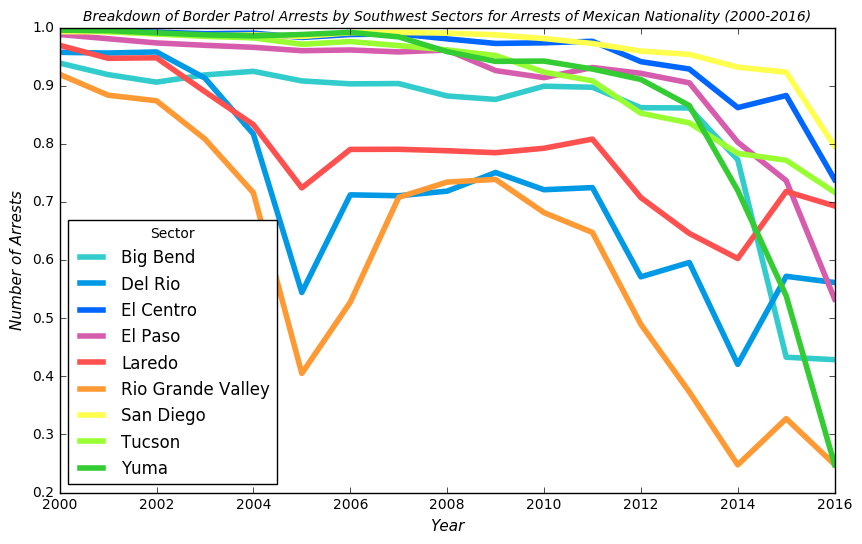

In [64]:
perc = south_mex / south_all
perc

perc.plot(linewidth=4, color=colors)#, color=[coast_color, north_color, south_color])
plt.gcf().set_size_inches(10,6)
plt.title('Breakdown of Border Patrol Arrests by Southwest Sectors for Arrests of Mexican Nationality (2000-2016)',
                  fontsize=10, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')
plt.show()

#south_all.loc['Avg'] = south_all.mean(0)
#south_mex.loc['Avg'] = south_mex.mean(0)
#south_all.loc['Avg']

in 2005, something occured on the right side of mexicos border that rsulted in less mexican people being arrested in comparison to others. all sectors started out between .9 and 1.0 in 2000 and all percentages were lower, many dramatically so, by 2016

In [90]:
import folium
pre_map = folium.Map(location=[37.09, -95.71], zoom_start=4)
post_map = folium.Map(location=[37.09, -95.71], zoom_start=4)

before_layer = r'./Pre2006.geojson'
after_layer = r'./Post2006.geojson'


pre_data = data.loc[idx[:,:,:2005], idx[:]] #Picks only entries of the year 'i'
pre_data.index = pre_data.index.droplevel([0,2]) #Drops border level
pre_data['Perc'] = pre_data['Mex Arrests'] / pre_data['All Arrests']
pre_data = pre_data.groupby(pre_data.index).mean()
pre_data['Sector'] = pre_data.index
pre_map.choropleth(geo_path=before_layer, data=pre_data,
             columns=['Sector', 'Perc'],
             key_on='feature.properties.sector',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='% of Mexican Arrests from 2000-2006')

post_data = data.loc[idx[:,:,2012:], idx[:]] #Picks only entries of the year 'i'
post_data.index = post_data.index.droplevel([0,2]) #Drops border level
post_data['Perc'] = post_data['Mex Arrests'] / post_data['All Arrests']
post_data = post_data.groupby(post_data.index).mean()
post_data['Sector'] = post_data.index
post_map.choropleth(geo_path=after_layer, data=post_data,
             columns=['Sector', 'Perc'],
             key_on='feature.properties.sector',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='% of Mexican Arrests from 2012-2016')

pre_map

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [91]:
post_map